## Projet Machine Learning Python Labs : Banks Churn
Date : March 2023

Authors : Diallo Mamadou Cellou - Nguyen Duy Khanh - Youssef Laodai 

For a bank it is more expensive to  attract new customers than to convince old ones to stay. Therefore, it is better to implement effective strategies to retain their customers in this very competitive sector. The objective of this project is to predict the churn risk of a bank so that it can implement measures to retain them. 

The data comes from https://www.kaggle.com/aakash50897/churn-modellingcsv. 
The study is based on the data of 10,000 customers of a bank evaluated on 14 variables.



# The package

In [1]:
# Ignore the warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Data Processing
import pandas as pd

# Tables, Matrices, Maths
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")

# Building models

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, roc_curve, auc

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Framework

In order to identify signs of customer disengagement, it is important to have a first empirical approach of the customer's practices. To do this, we acquire a set of data describing the customer's activities and profile. Thus our objectives are the following:
 



* Identify the factors that contribute to customer disengagement
* Develop a predictive model that enables banks to make informed decisions to retain their customers more efficiently.


# Data processing and description

## Data Description

In [2]:
customers = pd.read_csv("C:/Users/Kennick/Documents/Python/ML_Project/Churn_Modelling.csv")

In [3]:
customers.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


The context of this study remains rather general as the data's interpretation leaves us confused. For example, a customer who has left a bank still has a remaining positive balance.

We observe 10,000 individuals described by 14 variables.

In [4]:
customers.shape

(10000, 14)

In [5]:
customers.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Missing Values

In [6]:
customers.isnull().sum()/len(customers)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64


These data are complete, there are no missing values.

### Variable descriptions

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Processing data - Feature Engineering

In [8]:
len(customers["CustomerId"].unique())

10000

#### Qualitative variables

The CustomerId variable is unique and will be used as an index

In [9]:
customers.index = customers["CustomerId"]

The variables RowNumber, Surname and CustomerId will not be useful for our study so they are removed

In [10]:
customers = customers.drop(columns=["CustomerId","RowNumber","Surname"])

Finally, the qualitative variables of Geography and Gender are encoded. The available encoders are "Label Encoder" and "One Hot Encoder". In this project, we use the Label Encoder. They encode the modalities of each categorical variable for a better understanding of the data by our predictors:

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customers["Gender"] = labelencoder.fit_transform(customers["Gender"])
customers["Geography"] = labelencoder.fit_transform(customers["Geography"])

Finally, we obtain:

In [12]:
customers.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
15574012,645,2,1,44,8,113755.78,2,1,0,149756.71,1
15592531,822,0,1,50,7,0.00,2,1,1,10062.80,0
15656148,376,1,0,29,4,115046.74,4,1,0,119346.88,1
15792365,501,0,1,44,4,142051.07,2,0,1,74940.50,0


## Exploration

#### Distributions

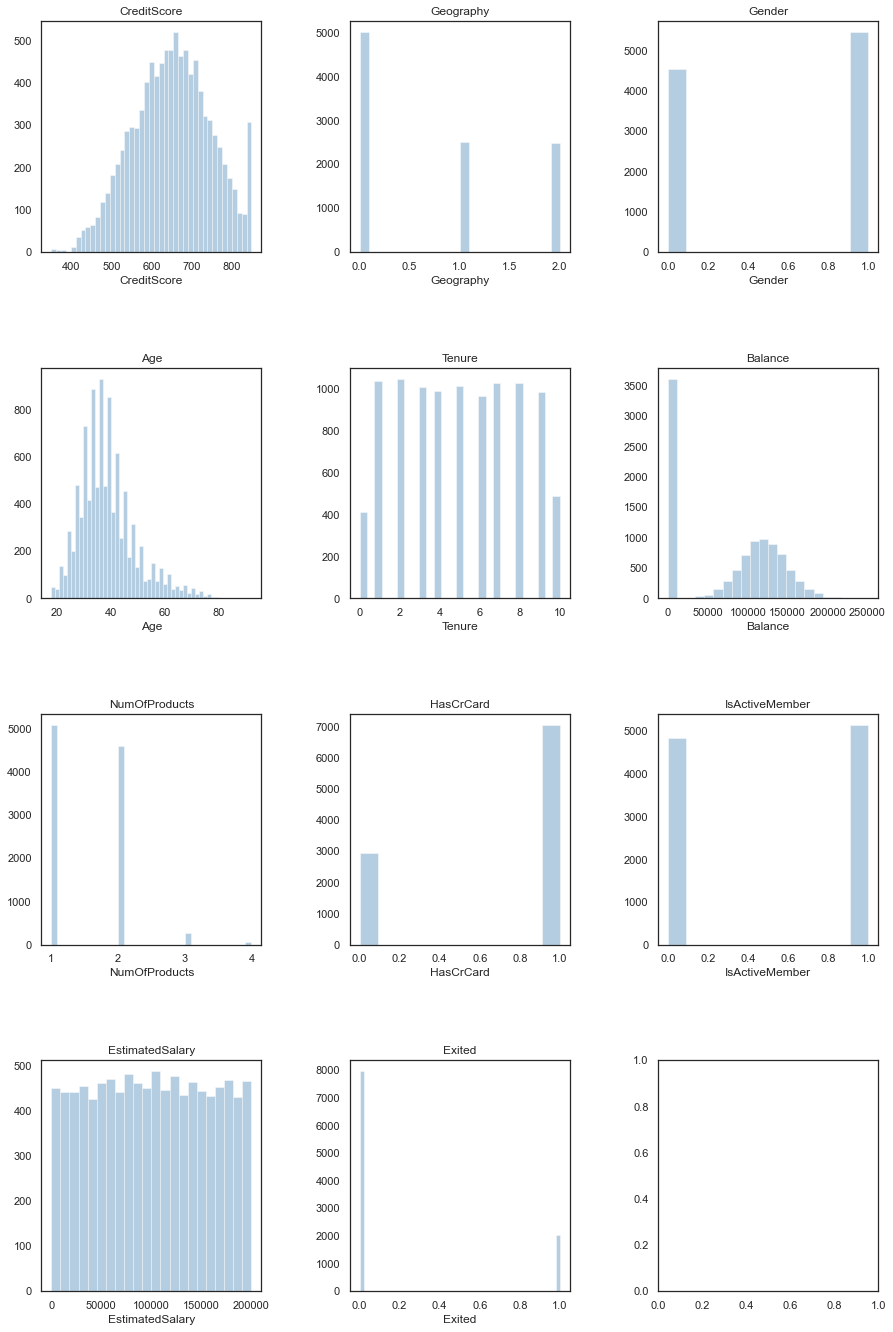

In [13]:
figure, axes = plt.subplots(4,3, figsize=(15,18))
for i in range(len(customers.columns)): 
    sns.distplot(a=customers[customers.columns[i]], ax = axes[i // 3][i % 3], color = "#4682b4", kde = False).set_title(customers.columns[i])
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)
plt.show()

* The CreditScore variable has a right-skewed distribution
* The variables Gender and IsActiveMember, HasCrCard and Exited are binary
* The Geography variable has three modalities
* The Age variable is left skewed with a right tail
* The variable EstimatedSalary has a high dispersion with a fair distribution
* The variables NumOfProducts and Tenure are discrete
* The balance variable seems to be a mixture of laws

The variables have intervals for this binary classification, an LDA could have been considered but this would suppose to have all the variables following a Gaussian which is not the case.

#### Correlation

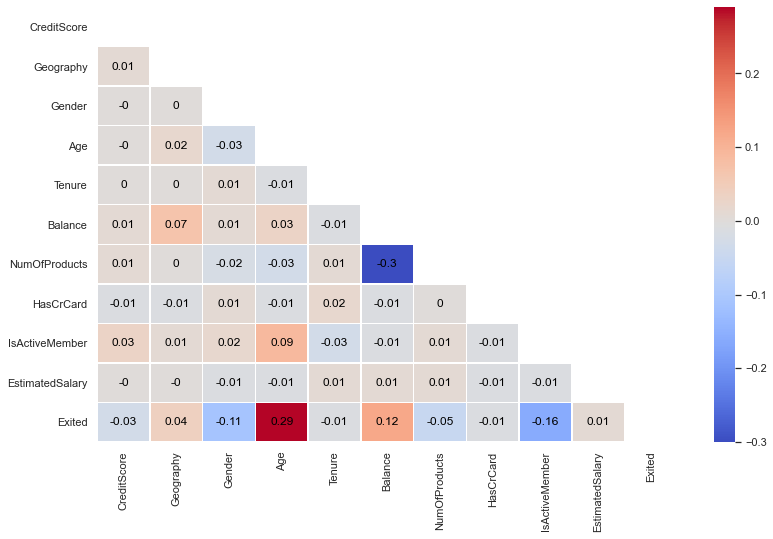

In [14]:
plt.figure(figsize = (13,8))
corr = np.round(customers.corr(),2) 
blank = np.zeros_like(corr)
blank[np.triu_indices_from(blank)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=blank, annot=True, cmap="coolwarm", linewidths=.5, annot_kws={"color":"black"})
plt.show()

We observe that the correlations between the variables are very low.

#### The variable of interest: Exited 

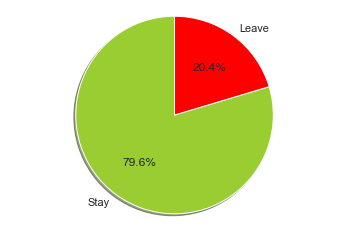

In [15]:
var_int = list(customers["Exited"])
leave = var_int.count(1)
stay = var_int.count(0)

labels = "Stay", "Leave", 
sizes = [stay, leave ]
colors = ["yellowgreen", "red"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

Looking at the diagram, we can say that with the models we will build, we will try to have good predictions.

## Applications of learning algorithms

First of all, we have to separate the data into a train set and a test set. The number of observations is high, 20% of them will be kept in test.

In [16]:
X = customers.drop(columns=["Exited"])
Y = customers["Exited"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True, random_state=0)

### Evaluation of the classifier performance

Then we will need measures to evaluate the performance of our classifiers. Recall that the variable of interest tells us whether each subject leaves the bank or not. The result for each subject may not correspond to reality. Four results are possible:

  
   * True Positive (TP): The customer has really left the bank and the bank has been notified of his departure
   * False Negative (FN): The individual is still a customer of the bank and the bank is notified
   * False Positive (FP): The customer has not left the bank but the bank no longer recognizes him
   * True Negative (TN): The customer has left the bank but the bank still recognizes him/her

These four results can be reformulated in a contingency curve or confusion matrix. This matrix is observed in a viz_confusion_matrix function.

We define different metrics to measure the performance of a binary classifier:

   * Accuracy (ACC) = (VP+VN)/(VN+FP+FN+VN)
   * Precision (PPV) = VP/(VP+VN)
   * Specificity (SPC) = VN/VN+FP
   * Sensitivity (SEN): SEN = VP/VP+FN
   * F1 Score : Weighted average of precision and specificity is interesting when dealing with "unbalanced" data

In [18]:
def viz_confusion_matrix(Y_pred):
    confmat = confusion_matrix(Y_test, Y_pred)
    df_confmat = pd.DataFrame(confmat, index = (0, 1), columns = (0, 1))
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(df_confmat, annot=True, fmt='g', ax=ax)
    plt.show()

In [19]:
def eval_perf(classifier, X_test, Y_test):
    Y_pred = classifier.predict(X_test)
    tfp, tvp, _ = roc_curve(Y_test.values, classifier.predict_proba(X_test)[:,1])
    dict_out = {
        "Precision" : precision_score(Y_test, Y_pred).round(3),
        "F1 Score" : f1_score(Y_test, Y_pred).round(3),
        "Accuracy" : accuracy_score(Y_test, Y_pred).round(3),
        'AUC': auc(tfp, tvp).round(3)
    }
    print("Metric :", dict_out)

In [20]:
def viz_roc_curve(classifier, name, X_test, Y_pred):
    tfp, tvp, _ = roc_curve(Y_test.values, classifier.predict_proba(X_test)[:,1])
    auc_val = auc(tfp, tvp)
    fig, ax = plt.subplots(figsize=(8, 7))
    plt.title('Courbe ROC - ' + name)
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls = "--")
    plt.plot([0, 0], [1, 0] , c = ".7"), plt.plot([1, 1] , c = ".7")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.show()

## Logistic regression

#### The model

In [21]:
LogReg = LogisticRegression(class_weight = "balanced", max_iter=1000)

#### Variable selection

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. 

This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [22]:
# Select the best variables
rfe = RFE(LogReg, n_features_to_select= None)
rfe = rfe.fit(X_train, Y_train)

# Summary of selected variables
print(rfe.support_)
print(rfe.ranking_)

# Train set with variable selection
X_train_selectedvar = X_train.columns[rfe.support_]
X_train_selectedvar

[False  True  True  True False False  True False  True False]
[4 1 1 1 3 5 1 2 1 6]


Index(['Geography', 'Gender', 'Age', 'NumOfProducts', 'IsActiveMember'], dtype='object')

##### Fitting

In [23]:
LogReg.fit(X_train[X_train_selectedvar], Y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

#### Prediction

In [24]:
Y_pred = LogReg.predict(X_test[X_train_selectedvar])

##### Performance

In [25]:
eval_perf(LogReg, X_test[X_train_selectedvar], Y_test)

Metric : {'Precision': 0.367, 'F1 Score': 0.485, 'Accuracy': 0.692, 'AUC': 0.756}


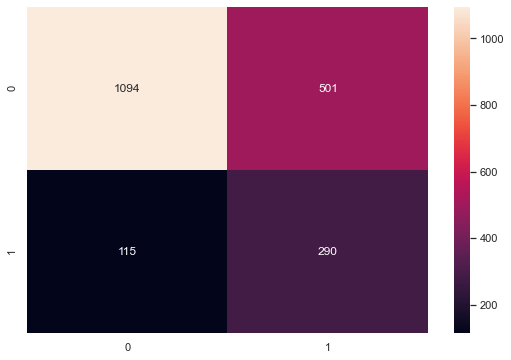

In [26]:
viz_confusion_matrix(Y_pred)

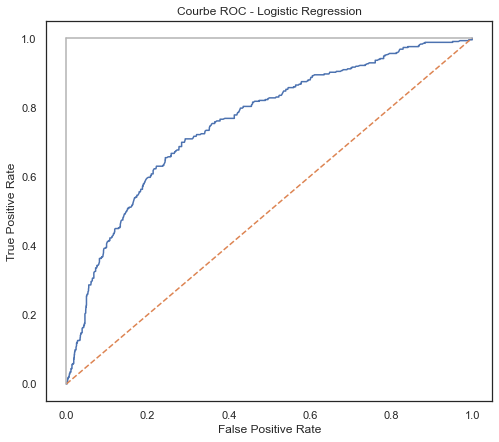

In [27]:
viz_roc_curve(LogReg, "Logistic Regression", X_test[X_train_selectedvar], Y_pred)

The results obtained are satisfactory: we obtain an area under the ROC curve of 0.755 (remember that an area equal to 0.5 is equivalent to a random prediction). We can see on the graph that the ROC curve is detached from the first bisector. Moreover, the transition matrix indicates that there are more true positives than false positives and more true negatives than false negatives: this is consistent with the results observed previously. Finally, we obtain an accuracy of 69.2% which means that our algorithm predicts the right label for 69.2% of our test base.

## K-Nearest Neighbors

#### Naive method

##### The model

Let's start by naively choosing a number of neighbors equal to 5.

In [28]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

##### Prediction

In [29]:
Y_pred = KNN.predict(X_test)

##### Performance

In [30]:
eval_perf(KNN, X_test, Y_test)

Metric : {'Precision': 0.291, 'F1 Score': 0.163, 'Accuracy': 0.764, 'AUC': 0.519}


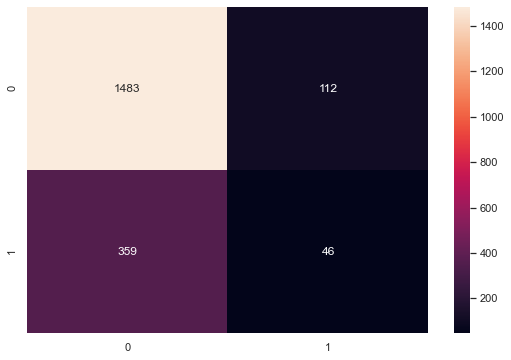

In [31]:
viz_confusion_matrix(Y_pred)

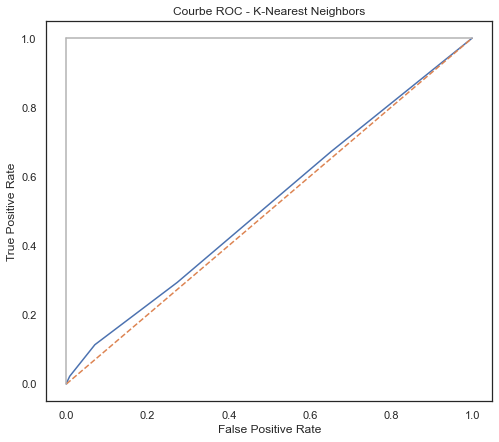

In [32]:
viz_roc_curve(KNN, "K-Nearest Neighbors", X_test, Y_pred)

Then, we implement a method where we determine K by cross-validation.

The results obtained are not satisfactory: although we obtain a relatively high accuracy of 76.4%, the area under the ROC curve is very low: 0.519. This is due to the fact that our algorithm almost always predicts the majority class (the remaining customers). This is clearly seen when we observe the confusion matrix. Thus, we obtain a high accuracy because the majority of our observations belong to the class '0', nevertheless our algorithm is not efficient because it predicts poorly the customers who will leave the bank.

### Cross-validation method

For each K-parameter classifier, 10 cross-validations are performed.

In [33]:
k_range = list(range(1, 31)) # Intervalle de k
weight_opts = ["uniform", "distance"] # Option sur les poids
param_grid = dict(n_neighbors = k_range, weights = weight_opts)

cv_knn = GridSearchCV(KNN, param_grid, scoring="accuracy", cv=10)
cv_knn.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [34]:
print("Best score : " + str(cv_knn.best_score_))
print("Optimal parameters : " + str(cv_knn.best_params_))

Best score : 0.796125
Optimal parameters : {'n_neighbors': 24, 'weights': 'uniform'}


We use the best parameter to make predictions:

In [35]:
KNN_opt = KNeighborsClassifier(n_neighbors=24, weights="uniform")

In [36]:
KNN_opt.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [37]:
eval_perf(KNN_opt, X_test, Y_test)

Metric : {'Precision': 0.2, 'F1 Score': 0.005, 'Accuracy': 0.796, 'AUC': 0.542}


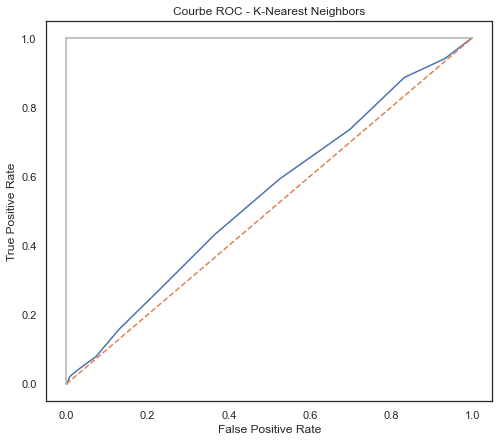

In [38]:
viz_roc_curve(KNN_opt, "K-Nearest Neighbors", X_test, Y_pred)

We have an improvement of the accuracy but the results remain quite poor, an area under a little higher but still as low which translates an AUC of 0.54. This algorithm is not adapted for this case.

### Random Forest

#### The Naïve Method

We can start by setting the number of classifiers to 100 (parameter n_estimators), choose the Gini criterion (parameter criterion) and the maximum depth of the trees to 10 (parameter max_depth). We also add the parameter class_weight = "balanced".

##### The model

In [39]:
RandomForest = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, n_jobs=-1, class_weight="balanced")

##### Fitting

In [40]:
RandomForest.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1)

##### Performance

In [41]:
eval_perf(RandomForest, X_test, Y_test)

Metric : {'Precision': 0.579, 'F1 Score': 0.633, 'Accuracy': 0.836, 'AUC': 0.871}


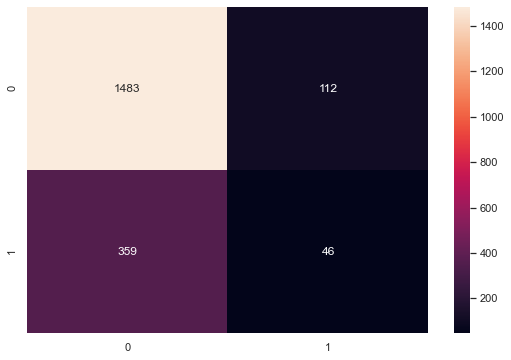

In [42]:
viz_confusion_matrix(Y_pred)

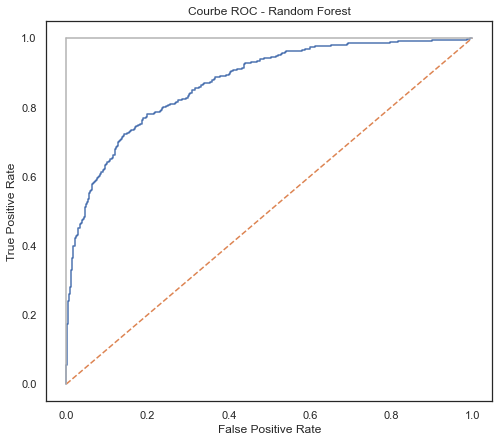

In [43]:
viz_roc_curve(RandomForest, "Random Forest", X_test, Y_pred)

We obtain good results: an area under the ROC curve of 0.869 and an accuracy of 83.6%. As for the logistic regression we have interesting results, nevertheless, the RandomForest algorithm provides us with the best performances among the three for the moment.

#### Cross-validation method

The most important parameters for Random Forest are:

   * n_estimators : number of trees
   * max_features : the maximum number of variables considered to split a node
   * max_depth : the depth of the tree
   * min_samples_split : the minimal number of points placed in a node before splitting it
   * min_samples_leaf : the minimum number of points allowed in a leaf
   * a boolean for the application of the bootstrap is a method of resampling the observations.

In [44]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RF_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RF_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 6, 7, 8],
                         'max_features': [2, 4, 6, 7, 8, 9],
                         'min_samples_split': [3, 5, 6, 7],
                         'n_estimators': [50, 100]})

In [45]:
RF_grid.best_params_

{'max_depth': 8,
 'max_features': 6,
 'min_samples_split': 6,
 'n_estimators': 100}

In [46]:
RF_opt = RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=8, max_features=9, min_samples_split=5)

In [47]:
RF_opt.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=5)

In [48]:
eval_perf(RF_opt, X_test, Y_test)

Metric : {'Precision': 0.741, 'F1 Score': 0.598, 'Accuracy': 0.864, 'AUC': 0.87}


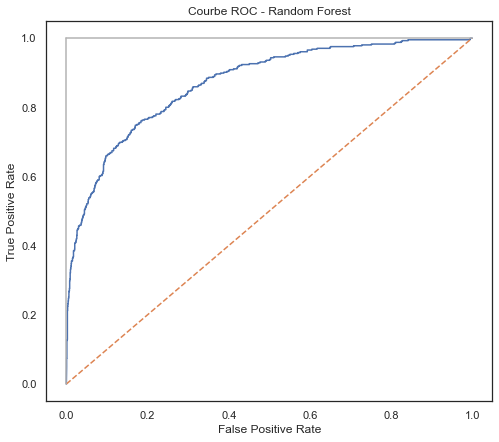

In [49]:
viz_roc_curve(RF_opt, "Random Forest", X_test, Y_pred)

In terms of metrics, we obtain good results with high rates. Moreover, the AUC area under the curve is 0.86 with an accuracy of 85.8%. The Random Forest offers convincing results. However, it is not the simplest algorithm to implement. Indeed, by its high number of parameters it is difficult to tune.

# Conclusion

The Random Forest algorithm among those used is the one that offers the most convincing result. Nevertheless, we also note good performances by the logistic regression. It is therefore possible to predict customer disengagement effectively with these algorithms. However, the number of customers who disengage in the data is low. The models could be improved by training them several times and evaluate the stability of the choice algorithm which gives good performances.